## Importing the essential libraries over here

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the dataset over here

In [2]:
data=pd.read_csv("Thyroid_Diff.csv")

In [3]:
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
data['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

## Taking care of duplicate observations if present over here

In [5]:
data.duplicated().sum()

19

In [6]:
data.drop_duplicates(inplace=True)

## Taking care of missing values if present over here

In [7]:
data.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

## Filtering all the numerical features over here

In [8]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!="O"]
for feature in numerical_features:
  print(feature)

Age


In [9]:
data[numerical_features]

,Age
0,27
1,34
2,30
3,62
4,62
...,...
378,72
379,81
380,72
381,61


## Filtering all the categorical features over here

In [10]:
cat_features=[feature for feature in data.columns if data[feature].dtype=="O"]
for feature in cat_features:
  print(feature)

Gender
Smoking
Hx Smoking
Hx Radiothreapy
Thyroid Function
Physical Examination
Adenopathy
Pathology
Focality
Risk
T
N
M
Stage
Response
Recurred


In [11]:
data[cat_features]

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


## Encoding the categorical features into numerical representation over here

In [12]:
data['Gender'].value_counts()

Gender
F    293
M     71
Name: count, dtype: int64

In [13]:
for feature in cat_features:
    feature_mapping = {category: index for index, category in enumerate(data[feature].unique())}
    data[feature] = data[feature].map(feature_mapping)


In [14]:
data

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,34,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,30,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0
3,62,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0
4,62,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,0,2,1,1,0,2,6,1,1,2,3,1
379,81,1,1,0,1,0,1,2,1,1,2,6,1,1,2,2,1
380,72,1,1,1,0,0,1,4,1,1,2,6,1,1,2,2,1
381,61,1,1,1,1,1,1,2,3,1,2,6,1,0,4,2,1


## Creating the features and labels over here

In [15]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

## Splitting the dataset into training set and testing set to avoid the problem of overfitting over here

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Experiment with different machine learning algorithms and at the end selecting the one giving more accuracy with respect to dependent variable over here

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0),
    "Support Vector Machine": SVC(kernel='linear'),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

results = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

best_classifier = max(results, key=results.get)
best_accuracy = results[best_classifier]

print("Best Classifier:", best_classifier)
print("Accuracy:", best_accuracy)

Best Classifier: Random Forest
Accuracy: 0.958904109589041


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Training the model on the training set over here

In [18]:
classifier=RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [19]:
y_pred=classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]


In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.958904109589041
[[51  1]
 [ 2 19]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.95      0.90      0.93        21

    accuracy                           0.96        73
   macro avg       0.96      0.94      0.95        73
weighted avg       0.96      0.96      0.96        73



In [21]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

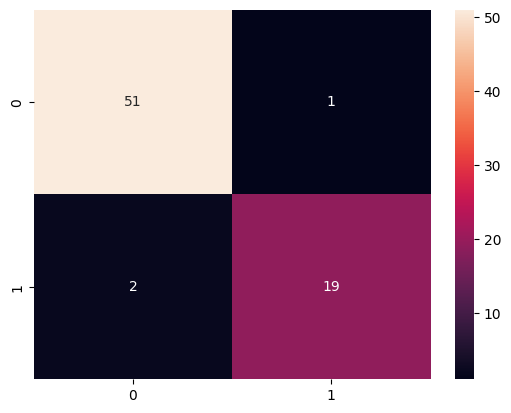

In [22]:
sns.heatmap(cm,annot=True)